# Loading Libraries and Initialize

In [1]:
%%capture
%run -i 1-ReadingData.ipynb

# Simple Linear Regression
Linear regression assumes a linear or straight line relationship between the input variables $x_i$ and the single output variable $y_i$.

### Goal
The goal is to find a straight line which has the minimum error.

\begin{align}
\large
y_i = b_0 + b_1 x_i
\end{align}

- $b_0$ is intersection of regression line with $y$ axis.
- $b_1$ is slope of the regression line.

### What is minimum error?

<img src="https://raw.githubusercontent.com/pournasserian/TimeSeries/master/Images/r-squared-graph.png">

If we iterate in sample data, we will have a residual (error) for each $x_i$ which shows the distance of the line.

So, we can represent the line formula with error as below:

\begin{align}
\large
y_i = b_0 + b_1 x_i + \epsilon_i
\end{align}

Now, we have to find $b_0$ and $b_1$. What are the best values for $b_0$ and $b_1$?

We define Cost function or Error function as below:

\begin{align}
\large
MSE = \frac {1} {n} \displaystyle\sum_{i=1}^{n} (y_i-\hat{y_i})^2 = \frac {1} {n} \displaystyle\sum_{i=1}^{n} (y_i-(b_0 + b_1 x_i))^2
\end{align}

We have to fine $b_0, b_1$ which minimize the error.



In [2]:
def compute_error_for_line_given_points(b0, b1, points):
    totalError = 0
    for i in range(0, len(points)):
        x = points[i, 0]
        y = points[i, 1]
        totalError += (y - (b1 * x + b0)) ** 2
    return totalError / float(len(points))

# Approach 2: Gradient Descent

We minimized $Error$ function by trial and error above — just trying lots of values and visually inspecting the resulting graph. There must be a better way: Gradient Descent. Gradient Descent is a general function for minimizing a function, in this case the Mean Squared Error cost function.

<img src="https://raw.githubusercontent.com/pournasserian/TimeSeries/master/Images/gradient_descent_example.gif">

Gradient Descent basically just does what we were doing by hand — change the $b_0, b_1$ values, or parameters, bit by bit, until we hopefully arrived a minimum.

First, we should calculate the derivative with respect to each parameter $b_0, b_1$ as below:
\begin{align}
\large
\frac {\partial } {\partial b_0} = \frac {-2} {n} \displaystyle\sum_{i=1}^{n} (y_i-(b_0 + b_1 x_i))\\
\large
\frac {\partial } {\partial b_1} = \frac {-2} {n} \displaystyle\sum_{i=1}^{n} x_i(y_i-(b_0 + b_1 x_i))
\end{align}

The Gradient Descent calculation steps will be as below:

- Assign initial zero (or random) values for $b_0, b_1$

\begin{align}
\large
b_0 = 0\ or\ Random\ Number \\
\large
b_1 = 0\ or\ Random\ Number
\end{align}

- Repeat until convergence:

\begin{align}
\large
b_0 := b_0 - \alpha \frac {2} {n} \displaystyle\sum_{i=1}^{n} (y_i - (b_0 + b_1 x_i))  \\
\large
b_1 := b_1 - \alpha \frac {2} {n} \displaystyle\sum_{i=1}^{n} x_i( y_i - (b_0 + b_1 x_i))
\end{align}

- $\alpha$ is a small number like 0.0003 which we call it: "Learning Rate". If we pick $\alpha$ too small, we need more calculatioin steps to converge. If $\alpha$ is too big, it will nerver converge. 

In [3]:
def gradient_descent_runner(points, starting_b0, starting_b1, learning_rate, num_iterations):
    b0 = starting_b0
    b1 = starting_b1
    for i in range(num_iterations):
        b0, b1 = step_gradient(b0, b1, points, learning_rate)
        if (i % 1000 == 0):
            print(i, b0, b1, compute_error_for_line_given_points(b0, b1, points))
    return [b0, b1]

def step_gradient(b0_current, b1_current, points, learningRate):
    b0_gradientsum = 0
    b1_gradientsum = 0
    n = float(len(points))
    for i in range(0, len(points)):
        x_i = points[i, 0]
        y_i = points[i, 1]
        b0_gradientsum += (y_i - (b0_current + (b1_current * x_i)))
        b1_gradientsum += x_i * (y_i - (b0_current + (b1_current * x_i)))
        
    new_b0 = b0_current - (learningRate * (-2) * b0_gradientsum / n)
    new_b1 = b1_current - (learningRate * (-2) * b1_gradientsum / n)
    return [new_b0, new_b1]

In [4]:
# defining input values as 2D array (points)
points = np.zeros((len(df), 2),dtype=np.dtype(float))
points[:,0] = np.arange(len(df))
points[:,1] = df['close']

learning_rate = 0.0000001 #learning rate
initial_b0 = 0.0 # initial y-intercept guess
initial_b1 = 0.0 # initial slope guess
num_iterations = 1000

print("Starting gradient descent at b0 = {0}, b1 = {1}, error = {2}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, points)))
print("Running...")
[b0, b1] = gradient_descent_runner(points, initial_b0, initial_b1, learning_rate, num_iterations)
print("After {0} iterations b0 = {1}, b1 = {2}, error = {3}".format(num_iterations, b0, b1, compute_error_for_line_given_points(b0, b1, points)))

Starting gradient descent at b0 = 0.0, b1 = 0.0, error = 12828.521824340583
Running...
0 2.181333969817316e-05 0.01567633897007148 10500.730089799707
After 1000 iterations b0 = 0.00330572345512227, b1 = 0.14852194431487875, error = 1186.7106195791926


## Visualizing All Data

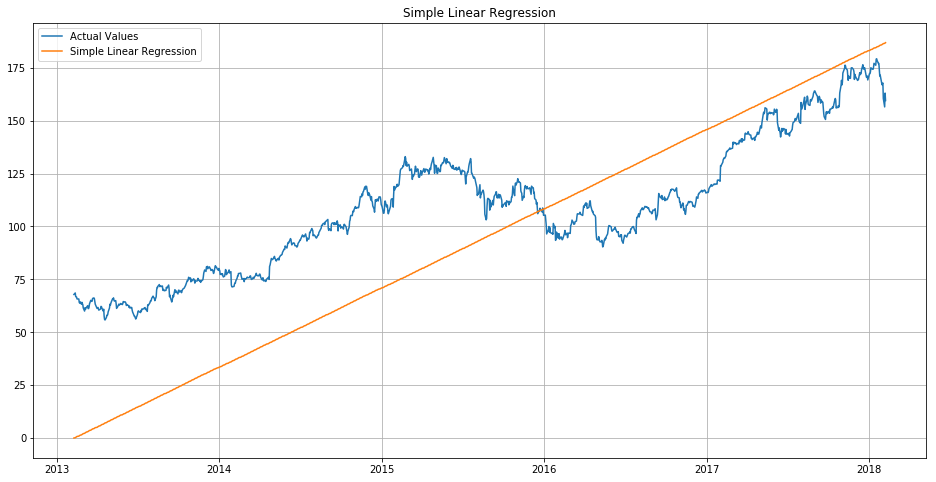

In [5]:
df['slr'] = b0 + b1 * np.arange(len(df)) 

plt.figure(figsize=(16,8))
plt.title('Simple Linear Regression')

plt.plot(df['close'], label='Actual Values')
plt.plot(df['slr'], label='Simple Linear Regression')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

As we can see in the plot, the result is not correct and the error is not reducing 1000 iterations.

So, what is the problem?

When we are using Gradient Descent, we should pick 2 hyper-parameters: learning-rate and number of iterations
- Learning Rat: if we select big number for the learning-rate, the error may go higher and it will not converge. If we choose very small number for learning-rate, the learning process will go too slow and it will take long time to converge to get the miniized error.
- Number of iterations: based on the result of the error, we will understand when to stop iterating. It means that if in the last 2 n-th iteration, the error does not have significant change, ite means that there will be no need to iterate more.

But, in above sample, we have set the correct values of both hyper-parameters and whic we are not getting the correct result?

## Feature Scaling (Normalization)
There is another important point in Gradent Descent that scaling for the data is so important. The X axis as a range of [0,1258] and the Y axis has the range of [50,180]. So the scale of 2 variables are different.

We need to rescale the variable (X,Y). The name of this technique is "Feature Scaling" or "Normalization".

There are 3 popular scaling formulas: 
- Rescaling (min-max normalization)
- Mean Normalization
- Standardization

### - Rescaling (min-max normalization)
Also known as min-max scaling or min-max normalisation, is the simplest method and consists in rescaling the range of features to scale the range in [0, 1] or [−1, 1]. Selecting the target range depends on the nature of the data. The general formula is given as:

\begin{align}
\large
x'_i := \frac {x_i - min(x)} {max(x) - min(x)}
\end{align}

If we have the rescaled values, we are able to convert to the real scale values.

\begin{align}
\large
x_i := x'_i (max(x) - min(x)) + min(x)
\end{align}

Starting gradient descent at b0 = 0.0, b1 = 0.0, error = 0.24738783945470416
Running...
0 0.004314955482409567 0.002787042667069134 0.24214378496327765
1000 0.21040235069177116 0.4627335057681726 0.02091271305533404
2000 0.1351174202165548 0.6033916133864916 0.015641225149805083
3000 0.09615365246675159 0.6761880540260717 0.014229249158555076
4000 0.07598819888858119 0.7138633952214678 0.01385104925821796
5000 0.06555169488840214 0.7333620317172773 0.013749747844099481
6000 0.06015034771197876 0.7434534287194668 0.013722614107434673
7000 0.05735491436382258 0.7486761679339613 0.013715346295116322
8000 0.055908155370420494 0.751379163851838 0.013713399600617612
9000 0.055159394328998225 0.7527780824330669 0.013712878175558026
After 10000 iterations b0 = 0.05477215164430873, b1 = 0.7535015722476915, error = 0.013712738578422175
b0=  [62.55262304] b1 =  [0.07389588]


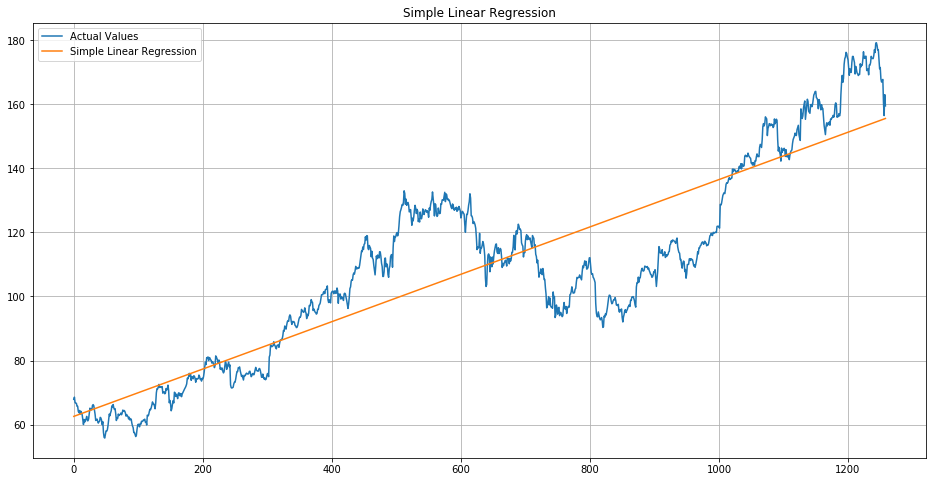

In [6]:
x = np.arange(len(df),dtype=np.dtype(float))
y = df['close'].values
x_minmax = (x - x.min()) / (x.max() - x.min())
y_minmax = (y - y.min()) / (y.max() - y.min())

# defining input values as 2D array (points)
points = np.zeros((len(df), 2),dtype=np.dtype(float))
points[:,0] = x_minmax
points[:,1] = y_minmax

learning_rate = 0.005 #learning rate
initial_b0 = 0.0 # initial y-intercept guess
initial_b1 = 0.0 # initial slope guess
num_iterations = 10000

print("Starting gradient descent at b0 = {0}, b1 = {1}, error = {2}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, points)))
print("Running...")
[b0, b1] = gradient_descent_runner(points, initial_b0, initial_b1, learning_rate, num_iterations)
print("After {0} iterations b0 = {1}, b1 = {2}, error = {3}".format(num_iterations, b0, b1, compute_error_for_line_given_points(b0, b1, points)))

yhat = b0 + b1 * x_minmax

df['slr'] = yhat * (y.max() - y.min()) + y.min() 

print('b0= ', df['slr'].values[0:1], 'b1 = ', (df['slr'].values[-1:] - df['slr'].values[0:1]) / len(df))

plt.figure(figsize=(16,8))
plt.title('Simple Linear Regression')

plt.plot(y, label='Actual Values')
plt.plot(df['slr'].values, label='Simple Linear Regression')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### - Mean Normalization
\begin{align}
\large
x'_i := \frac {x_i - \bar x} {max(x) - min(x)}
\end{align}

\begin{align}
\large
x_i := x'_i (max(x) - min(x)) + \bar x
\end{align}



Starting gradient descent at b0 = 0.0, b1 = 0.0, error = 0.06119943130293981
Running...
0 -2.144167819202596e-18 0.00062956492586435 0.06112019398560804
1000 -7.584062228284788e-17 0.42729178850168026 0.022636891676575795
2000 -7.438604493644663e-17 0.6124083976088366 0.015392620140587206
3000 -7.900859386026321e-17 0.6927252315674048 0.01402892557857405
4000 -8.270478115789321e-17 0.7275724224717822 0.013772217523219452
5000 -7.801477229652012e-17 0.7426916279244336 0.013723893633457333
6000 -8.307162212552167e-17 0.7492514213421235 0.013714796925064155
7000 -8.04477391948048e-17 0.7520975292158154 0.013713084519378298
8000 -7.816688784199059e-17 0.7533323745093963 0.013712762168357888
9000 -8.09349498549362e-17 0.7538681387765105 0.013712701487538401
After 10000 iterations b0 = -8.125196746999e-17, b1 = 0.7541004428436436, error = 0.013712690069132893
b0=  [62.51226995] b1 =  [0.07395461]


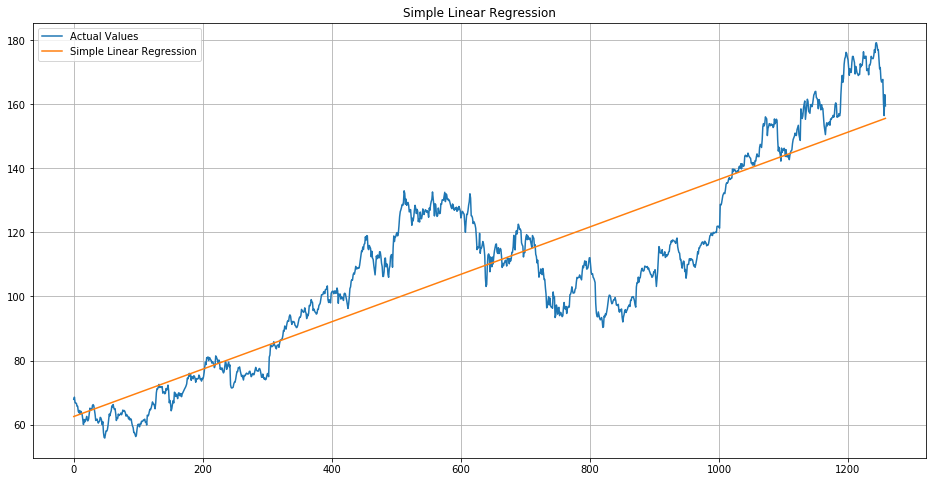

In [7]:
x = np.arange(len(df),dtype=np.dtype(float))
y = df['close'].values
x_meannorm = (x - x.mean()) / (x.max() - x.min())
y_meannorm = (y - y.mean()) / (y.max() - y.min())

# defining input values as 2D array (points)
points = np.zeros((len(df), 2),dtype=np.dtype(float))
points[:,0] = x_meannorm
points[:,1] = y_meannorm

learning_rate = 0.005 #learning rate
initial_b0 = 0.0 # initial y-intercept guess
initial_b1 = 0.0 # initial slope guess
num_iterations = 10000

print("Starting gradient descent at b0 = {0}, b1 = {1}, error = {2}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, points)))
print("Running...")
[b0, b1] = gradient_descent_runner(points, initial_b0, initial_b1, learning_rate, num_iterations)
print("After {0} iterations b0 = {1}, b1 = {2}, error = {3}".format(num_iterations, b0, b1, compute_error_for_line_given_points(b0, b1, points)))

yhat = b0 + b1 * x_meannorm

df['slr'] = yhat * (y.max() - y.min()) + y.mean() 

print('b0= ', df['slr'].values[0:1], 'b1 = ', (df['slr'].values[-1:] - df['slr'].values[0:1]) / len(df))

plt.figure(figsize=(16,8))
plt.title('Simple Linear Regression')

plt.plot(y, label='Actual Values')
plt.plot(df['slr'].values, label='Simple Linear Regression')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

### - Standardization
\begin{align}
\large
x'_i := \frac {x_i - \bar x} {s_x}
\end{align}

$s_x$ is Standard Deviation (STD).

\begin{align}
\large
x_i := x'_i s_x + \bar x
\end{align}

Starting gradient descent at b0 = 0.0, b1 = 0.0, error = 1.0000000000000016
Running...
0 -4.807733066128954e-18 0.008808713856286055 0.9845589054794169
1000 -3.277468315276869e-16 0.880833737595244 0.2240656033981164
2000 -3.235546152774343e-16 0.8808713840032918 0.2240656019807421
3000 -3.023095850079596e-16 0.8808713856285344 0.22406560198074238
4000 -1.6657137235149438e-16 0.8808713856285991 0.22406560198074205
5000 -1.669241040511447e-16 0.8808713856285991 0.22406560198074205
6000 -1.665995908874812e-16 0.8808713856285991 0.22406560198074205
7000 -1.6695232258713152e-16 0.8808713856285991 0.22406560198074205
8000 -1.6662780942346802e-16 0.8808713856285991 0.22406560198074205
9000 -1.6698054112311833e-16 0.8808713856285991 0.22406560198074205
After 10000 iterations b0 = -1.667741930788351e-16, b1 = 0.8808713856285991, error = 0.22406560198074205
b0=  [62.50126278] b1 =  [0.0739721]


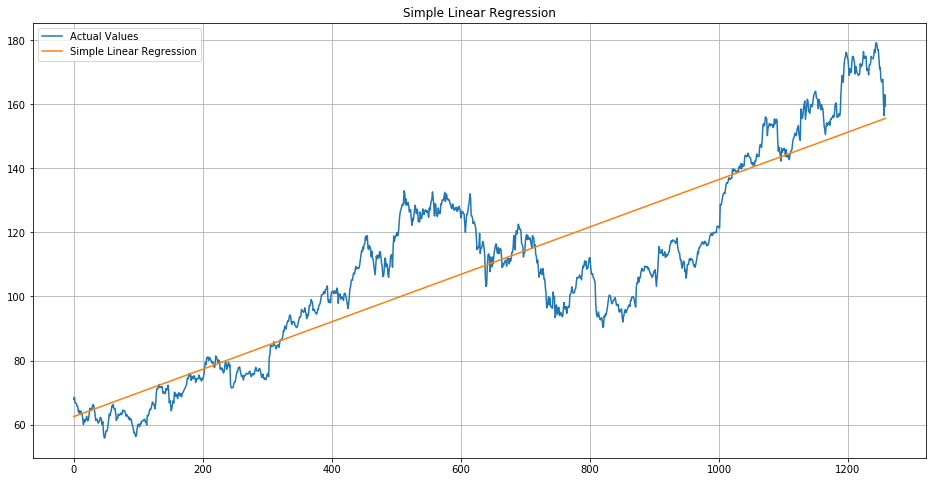

In [8]:
x = np.arange(len(df),dtype=np.dtype(float))
y = df['close'].values
x_standard = (x - x.mean()) / x.std()
y_standard = (y - y.mean()) / y.std()
# defining input values as 2D array (points)
points = np.zeros((len(df), 2),dtype=np.dtype(float))
points[:,0] = x_standard
points[:,1] = y_standard

learning_rate = 0.005 #learning rate
initial_b0 = 0.0 # initial y-intercept guess
initial_b1 = 0.0 # initial slope guess
num_iterations = 10000

print("Starting gradient descent at b0 = {0}, b1 = {1}, error = {2}".format(initial_b0, initial_b1, compute_error_for_line_given_points(initial_b0, initial_b1, points)))
print("Running...")
[b0, b1] = gradient_descent_runner(points, initial_b0, initial_b1, learning_rate, num_iterations)
print("After {0} iterations b0 = {1}, b1 = {2}, error = {3}".format(num_iterations, b0, b1, compute_error_for_line_given_points(b0, b1, points)))

yhat = b0 + b1 * x_standard

df['slr'] = yhat * y.std() + y.mean() 

print('b0= ', df['slr'].values[0:1], 'b1 = ', (df['slr'].values[-1:] - df['slr'].values[0:1]) / len(df))

plt.figure(figsize=(16,8))
plt.title('Simple Linear Regression')

plt.plot(y, label='Actual Values')
plt.plot(df['slr'].values, label='Simple Linear Regression')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()

## Visualizing Feature Scaled Values 

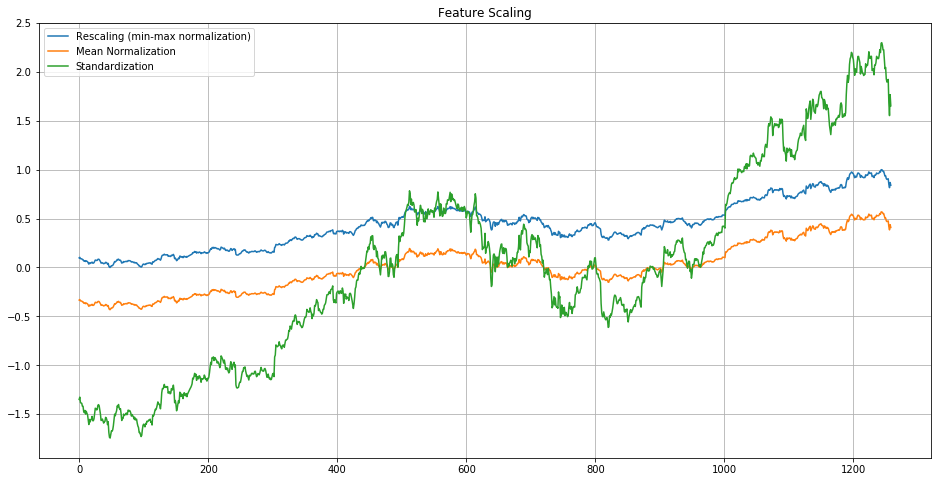

In [9]:
plt.figure(figsize=(16,8))
plt.title('Feature Scaling')

plt.plot(y_minmax, label='Rescaling (min-max normalization)')
plt.plot(y_meannorm, label='Mean Normalization')
plt.plot(y_standard, label='Standardization')

plt.legend(loc='upper left')
plt.grid(True)
plt.show()